# The Sparks Foundation - Internship
#### Data Science and Business Analytics (Task-2)

## Name - Shyam Modi
## Exploratory Data Analysis - Terrorism

#### Performing EDA on dataset 'Global Terrorism'
#### Dataset - https://bit.ly/2TK5Xn5

In [1]:
#importing important libraries for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset on jupyter notebook
data = pd.read_csv('C:/Users/DELL/Datasets/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

In [3]:
#first five records 
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.shape

(181691, 135)

In [5]:
#All columns in the data
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## 1. Data pre-processing and description

In [6]:
#Changing names for convenience
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [7]:
#Creating new variable to store only necessary columns
terror = data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [8]:
#Checking for null values 
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [9]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

## 2. Data Exploration
### Terrorism around the world has risen at a steady rate in the last few decades
### Iraq being the most affected country with 2014 being the worst year

In [10]:
print("Country with the most attacks:",terror['Country'].value_counts().idxmax())
print("City with the most attacks:",terror['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror['Group'].value_counts().index[1])
print("Most Attack Types:",terror['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [11]:
terror['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

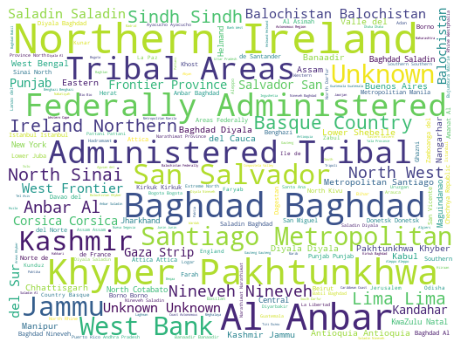

In [12]:
#States and cities with highest terror attacks
from wordcloud import WordCloud
from scipy import signal
cities = terror.state.dropna(False)
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Barplot (world-wide attacks over the years)

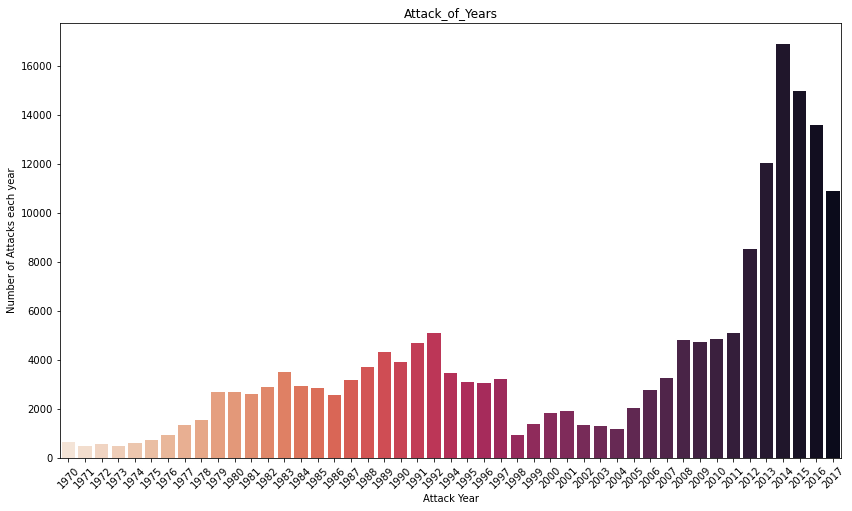

In [13]:
x_year = terror['Year'].unique()
y_count_years = terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (14,8))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket_r')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

## 3. Terrorist Activities by Region in each Year through Area Plot
### Middle East, North Africa and South Asia most affected in recent times

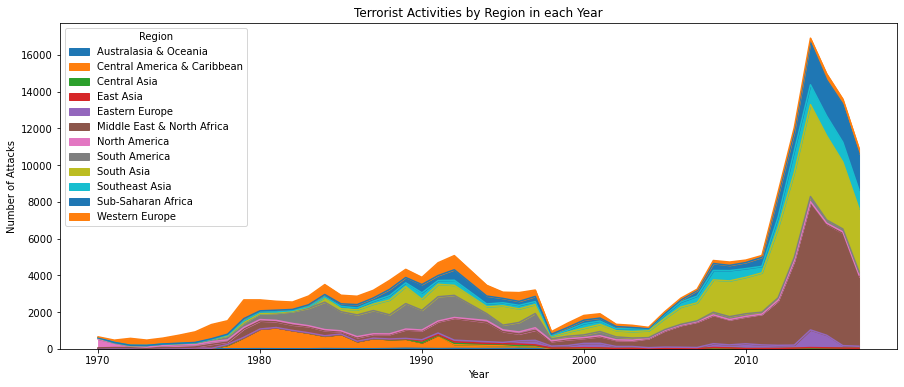

In [14]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [15]:
terror['Wounded'] = terror['Wounded'].fillna(0).astype(int)
terror['Killed'] = terror['Killed'].fillna(0).astype(int)
terror['casualities'] = terror['Killed'] + terror['Wounded']

In [16]:
terror_df1 = terror.sort_values(by='casualities',ascending=False)[:40]
heat=terror_df1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

### Heatmap for 40 worst terror attacks

In [17]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

#z is the number of casualities

## 4. Total number of attacks by terror groups

In [18]:
# Terror attacks by terror groups 
terror.Group.value_counts()[1:15]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group, dtype: int64

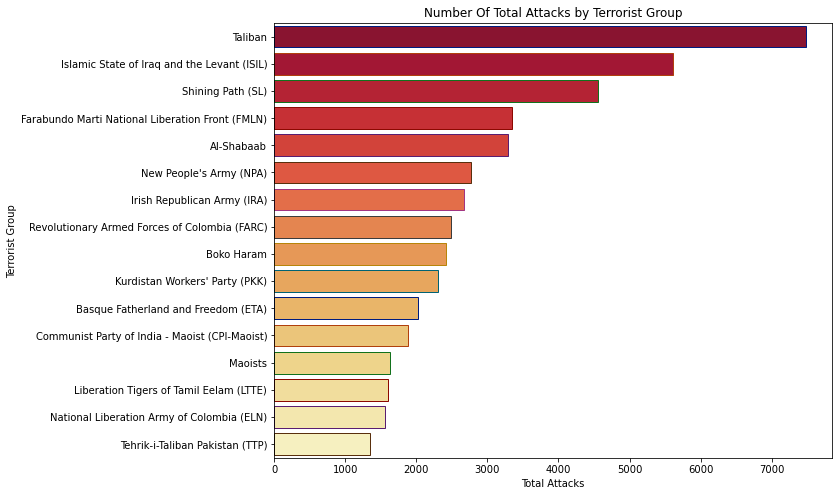

In [19]:
group_attacks = terror.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
plt.subplots(figsize=(10,8))
sns.barplot(y=group_attacks['Terrorist Group'], x=group_attacks['Total Attacks'], palette='YlOrRd_r',
            edgecolor=sns.color_palette('dark', 10))
# plt.xticks()
plt.title('Number Of Total Attacks by Terrorist Group')
plt.show()

### Taliban, ISIL and Shining Path being top three terror groups in the world

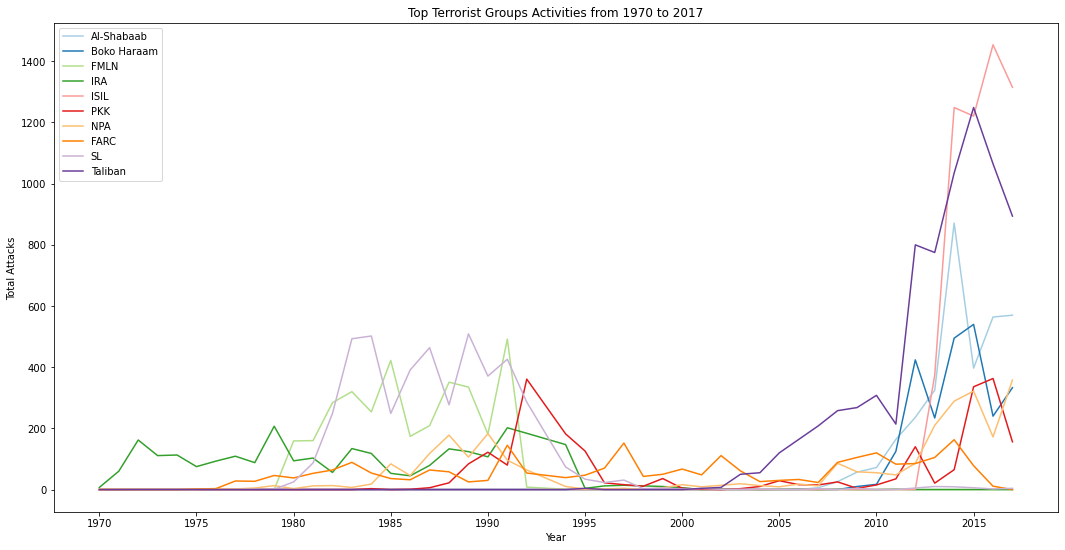

In [20]:
groups_10 = terror[terror.Group.isin(terror.Group.value_counts()[1:11].index)]
pd.crosstab(groups_10.Year, groups_10.Group).plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(18,9)
plt.xticks(range(1970, 2017, 5))
plt.ylabel('Total Attacks')
plt.title('Top Terrorist Groups Activities from 1970 to 2017')
plt.legend(labels=['Al-Shabaab',
                   'Boko Haraam',
                   'FMLN',
                   'IRA',
                   'ISIL',
                   'PKK',
                   'NPA',
                   'FARC',
                   'SL',
                   'Taliban'], loc='upper left')
plt.show()

## 5. Countries\Regions most affected by terrorism

In [21]:
terror.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

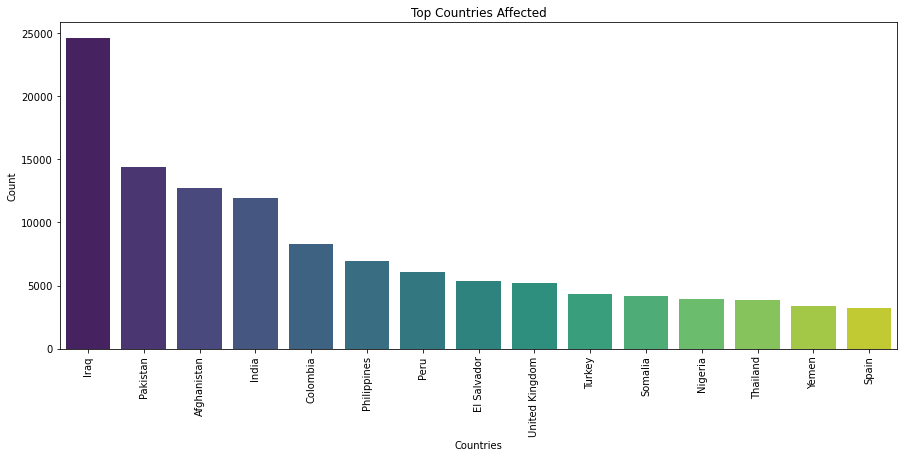

In [22]:
plt.subplots(figsize=(15,6))
sns.barplot(terror['Country'].value_counts()[:15].index,terror['Country'].value_counts()[:15].values,palette='viridis')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

### Iran, Pakistan and Afghanistan are the most affected countries by terrorism.
### Middle East and North Africa are most affected regions

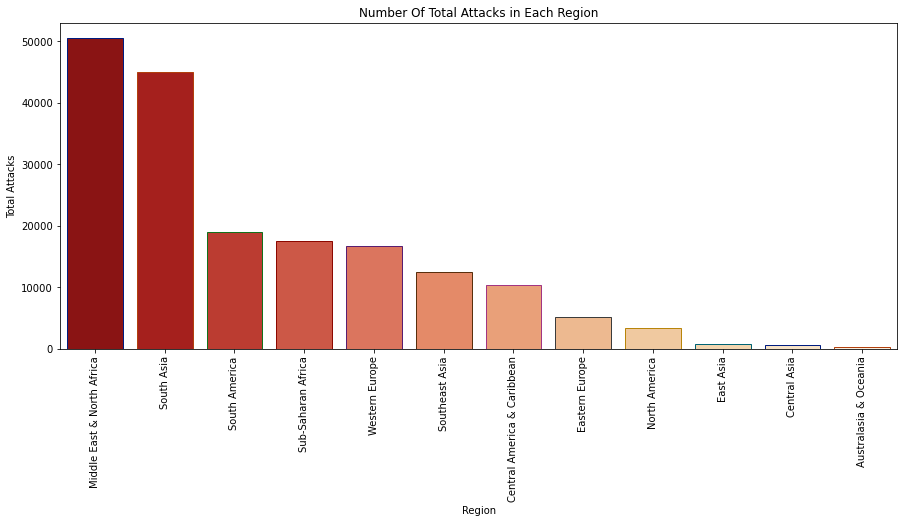

In [23]:
region_attacks = terror.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'], palette='OrRd_r', edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks in Each Region')
plt.show()

## 6. Comparing terror attacks in different countries along with timeline

In [24]:
terror_bubble_df = terror[(terror['Group'] != 'Unknown') & (terror['casualities'] > 50)]
terror_bubble_df = terror_bubble_df.sort_values(['Region', 'Country'])
terror_bubble_df = terror_bubble_df.dropna(subset=['city'])

In [25]:
terror_bubble_df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
state             3
Region            0
city              0
latitude         62
longitude        62
AttackType        0
Killed            0
Wounded           0
Target            9
Summary         517
Group             0
Target_type       0
Weapon_type       0
Motive         1059
casualities       0
dtype: int64

In [26]:
hover_text = []
for index, row in terror_bubble_df.iterrows():
    hover_text.append(('City: {city}<br>'+
                      'Group: {group}<br>'+
                      'casualities: {casualities}<br>'+
                      'Year: {year}').format(city=row['city'],
                                            group=row['Group'],
                                            casualities=row['casualities'],
                                            year=row['Year']))
terror_bubble_df['text'] = hover_text


In [27]:
trace0 = go.Scatter(
    x=terror_bubble_df['Year'][terror_bubble_df['Country'] == 'Iraq'],
    y=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'Iraq'],
    mode='markers',
    name='Iraq',
    text=terror_bubble_df['text'][terror_bubble_df['Country'] == 'Iraq'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'Iraq'],
        line=dict(
            width=2
        ),
    )
)
trace1 = go.Scatter(
    x=terror_bubble_df['Year'][terror_bubble_df['Country'] == 'Pakistan'],
    y=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'Pakistan'],
    mode='markers',
    name='Pakistan',
    text=terror_bubble_df['text'][terror_bubble_df['Country'] == 'Pakistan'],
    marker=dict(symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'Pakistan'],
        line=dict(
            width=2
        ),
    )
)
trace2 = go.Scatter(
    x=terror_bubble_df['Year'][terror_bubble_df['Country'] == 'Afghanistan'],
    y=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'Afghanistan'],
    mode='markers',
    name='Afghanistan',
    text=terror_bubble_df['text'][terror_bubble_df['Country'] == 'Afghanistan'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'Afghanistan'],line=dict(
            width=2
        ),
    )
)
trace3 = go.Scatter(
    x=terror_bubble_df['Year'][terror_bubble_df['Country'] == 'India'],
    y=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'India'],
    mode='markers',
    name='India',
    text=terror_bubble_df['text'][terror_bubble_df['Country'] == 'India'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'India'],
        line=dict(
            width=2
        ),
    )
)

In [28]:
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
         title = 'The Big Four',
         xaxis = dict(
             title = 'Year',
             #type = 'log',
             range = [1976,2016],
             tickmode = 'auto',
             nticks = 30,
             showline = True,
             showgrid = False
             ),
         yaxis = dict(
             title = 'Casualities',
             type = 'log',
             range = [1.8,3.6],
             tickmode = 'auto',
             nticks = 40,
             showline = True,
             showgrid = False),
         paper_bgcolor='rgb(243, 243, 243)',
         plot_bgcolor='rgb(243, 243, 243)',
         )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Terrorism Bubble')

### Terror attacks in India have dropped in the last few years

##  7. Terror attacks on a world map (year - 2006)

In [29]:
import folium
from folium.plugins import MarkerCluster 
filterYear = terror['Year'] == 2006
filterData = terror[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [30]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

## CONCLUSION
* Country with the most attacks: Iraq
* City with the most attacks: Baghdad
* Region with the most attacks: Middle East & North Africa
* Year with the most attacks: 2014
* Group with the most attacks: Taliban
* Most Common Attack Types: Bombing/Explosion

## For India
* Terror attacks in India have dropped in the last few years.
* No new separatist organisation has risen.
* Taliban and other foreign terror groups remain threat for India since Taliban has gained full control over Afghanistan.